In [2]:
import stdpopsim as sim
import tskit
import msprime as msp
import numpy as np

/workspaces/GenTreeCombine/.conda/lib/python3.11/site-packages/stdpopsim/catalog/HomSap/demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
/workspaces/GenTreeCombine/.conda/lib/python3.11/site-packages/stdpopsim/catalog/HomSap/demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


In [3]:
model_IM = sim.IsolationWithMigration(NA=10^4, N1=10^4, N2=10^4, T=10^4, M12=0, M21=0)

In [40]:
position = np.arange(0, 1e5, 1, dtype=int).tolist()
position.append(1e5)

rate = np.repeat(1e-8, 100000).tolist()

In [41]:
chr1 = sim.Contig(
    mutation_rate=0,
    ploidy=2,
    recombination_map=msp.RateMap(position=position, rate=rate),
    original_coordinates=(1, 0, 1000)
) 

In [42]:
engine = sim.get_engine('msprime')
ts = engine.simulate(
    model_IM, 
    contig=chr1,
    samples = {
        "pop1": 10,
        "pop2": 10
    },
    seed=1
)

In [43]:
ts.num_trees

1

In [47]:
ts.breakpoints(as_array=True)


array([     0., 100000.])

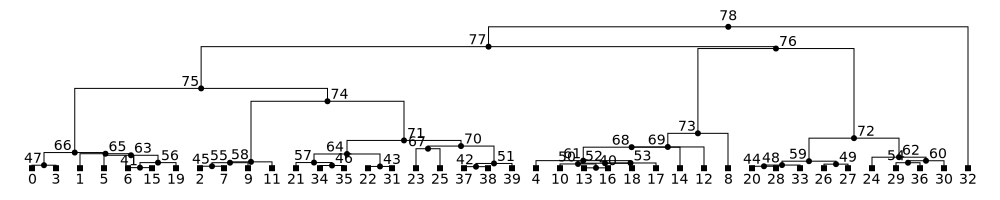

In [44]:
tsfirst = ts.first()

tsfirst.draw(format="svg", width=1000)